# Simple CNN model for CIFAR-10


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.models import load_model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# load data

In [38]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0

In [39]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [40]:
print(X_train.shape)

(50000, 32, 32, 3)


# one hot encode labels

In [41]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [42]:
print(num_classes)

10


# Create the model

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile model

In [44]:
epochs = 70
lrate = 0.001
sgd = Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [45]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

# Fit the model

In [46]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1)

Epoch 1/70
391/391 [==============================] - 7s 15ms/step - loss: 2.3004 - accuracy: 0.1502 - val_loss: 1.7548 - val_accuracy: 0.4070
Epoch 2/70
391/391 [==============================] - 5s 13ms/step - loss: 1.7791 - accuracy: 0.3209 - val_loss: 1.5264 - val_accuracy: 0.4823
Epoch 3/70
391/391 [==============================] - 5s 13ms/step - loss: 1.6468 - accuracy: 0.3727 - val_loss: 1.4228 - val_accuracy: 0.5150
Epoch 4/70
391/391 [==============================] - 5s 13ms/step - loss: 1.5774 - accuracy: 0.4074 - val_loss: 1.4046 - val_accuracy: 0.5112
Epoch 5/70
391/391 [==============================] - 5s 13ms/step - loss: 1.5344 - accuracy: 0.4302 - val_loss: 1.3537 - val_accuracy: 0.5536
Epoch 6/70
391/391 [==============================] - 5s 14ms/step - loss: 1.4965 - accuracy: 0.4450 - val_loss: 1.2908 - val_accuracy: 0.5579
Epoch 7/70
391/391 [==============================] - 6s 14ms/step - loss: 1.4579 - accuracy: 0.4577 - val_loss: 1.2531 - val_accuracy: 0.5745

# Final evaluation of the model

In [47]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: %.2f%%" %(scores[0]*100))
print("Test Accuracy of existing model: %.2f%%" % (scores[1]*100))

Test Loss: 87.90%
Test Accuracy of existing model: 69.85%


# 1. Follow the instruction below and then report how the performance changed

*   Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
*   Dropout layer at 20%.
*   Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier  activation function.
*   Max Pool layer with size 2×2.
*   Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
*   Dropout layer at 20%.
*   Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
*   Max Pool layer with size 2×2.
*   Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
*   Dropout layer at 20%.
*   Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
*   Max Pool layer with size 2×2.
*   Flatten layer.
*   Dropout layer at 20%.
*   Fully connected layer with 1024 units and a rectifier activation function.
*   Dropout layer at 20%.
*   Fully connected layer with 512 units and a rectifier activation function.
*   Dropout layer at 20%.
*   Fully connected output layer with 10 units and a softmax activation function

In [48]:
# Create model 2
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [49]:
epochs = 70
lrate = 0.001
sgd = Adam(learning_rate=lrate)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [50]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)       

In [51]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1)

Epoch 1/70
391/391 [==============================] - 9s 19ms/step - loss: 1.9274 - accuracy: 0.2744 - val_loss: 1.3734 - val_accuracy: 0.5117
Epoch 2/70
391/391 [==============================] - 7s 17ms/step - loss: 1.2771 - accuracy: 0.5355 - val_loss: 1.0522 - val_accuracy: 0.6316
Epoch 3/70
391/391 [==============================] - 7s 17ms/step - loss: 1.0245 - accuracy: 0.6383 - val_loss: 0.9108 - val_accuracy: 0.6805
Epoch 4/70
391/391 [==============================] - 7s 17ms/step - loss: 0.8712 - accuracy: 0.6903 - val_loss: 0.8167 - val_accuracy: 0.7142
Epoch 5/70
391/391 [==============================] - 7s 17ms/step - loss: 0.7717 - accuracy: 0.7289 - val_loss: 0.8005 - val_accuracy: 0.7217
Epoch 6/70
391/391 [==============================] - 7s 17ms/step - loss: 0.6907 - accuracy: 0.7568 - val_loss: 0.6918 - val_accuracy: 0.7604
Epoch 7/70
391/391 [==============================] - 7s 17ms/step - loss: 0.6293 - accuracy: 0.7797 - val_loss: 0.6872 - val_accuracy: 0.7622

# 2. Did the performance change?

In [52]:
# Save the model
model2.save('cifar10_model.h5')
# Loading the model
saved_model = load_model('cifar10_model.h5')

# Model evaluation
scores = saved_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy after adding Convolutional layers: %.2f%%" % (scores[1]*100))

Test Accuracy after adding Convolutional layers: 82.38%


**Obeservation:** We see that there is an improvement in the accuracy after we added convolutional layers to the existing model.

# 3. Change the previous model into Keras Functional API model.

In [53]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
X_train, X_val = X_train / 255.0, X_val / 255.0
y_train, y_val = y_train.flatten(), y_val.flatten()

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), padding="same", activation="relu")(i)
x = Conv2D(32, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.30)(x)
x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = Conv2D(64, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.30)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="softmax")(x)

api_model = Model(i, x)
api_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        3692

In [54]:
api_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
api_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7719 - accuracy: 0.3639 - val_loss: 1.3274 - val_accuracy: 0.5361
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2219 - accuracy: 0.5643 - val_loss: 0.9987 - val_accuracy: 0.6477
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0538 - accuracy: 0.6323 - val_loss: 0.8544 - val_accuracy: 0.7005
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9619 - accuracy: 0.6594 - val_loss: 1.0066 - val_accuracy: 0.6530
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8974 - accuracy: 0.6859 - val_loss: 0.8414 - val_accuracy: 0.7104
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8464 - accuracy: 0.7020 - val_loss: 0.7693 - val_accuracy: 0.7349
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8134 - accuracy: 0.7158 - val_loss: 0.7788 - val_a

In [56]:
# Save the model
api_model.save('api_model.h5')
# Loading the model
api_saved_model = load_model('api_model.h5')

In [57]:
# Model evaluation
scores = api_saved_model.evaluate(X_val, y_val, verbose=0)
print("Test Accuracy for functional API model: %.2f%%" % (scores[1]*100))

Test Accuracy for functional API model: 81.39%


# 4. Predict the first 4 image of the test data. Then, print the actual label for those 4 images (label means the probability associated with them) to check if the model predicted correctly or not.

In [58]:
classes = ['airplaine', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

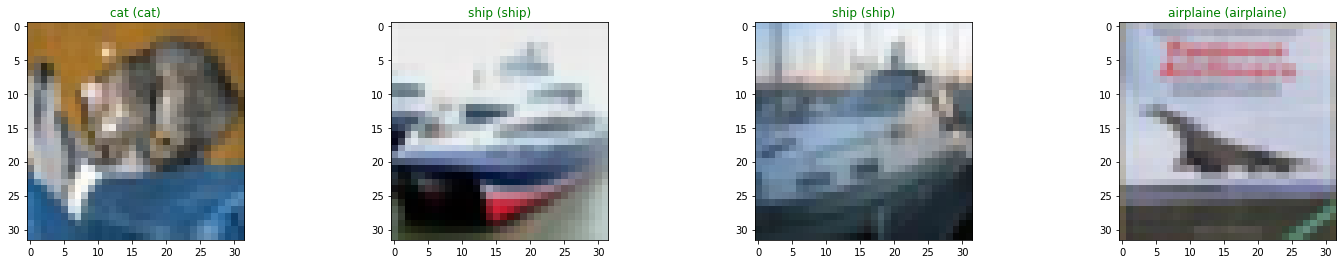

In [59]:
fig = plt.figure(figsize=(25, 4))
#fig, ax = plt.subplots()
for idx in range(4):
  ax = fig.add_subplot(1, 4, idx+1)
  ax.imshow(X_test[idx])
  y_pred = np.argmax(saved_model.predict(np.expand_dims(X_test[idx], axis=0)), axis=1)
  y_actual= np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(classes[y_pred.item()], classes[y_actual]), color=("green" if y_pred.item()== y_actual else "red"))

**Observation:** We see that the new model is correctly predicting all the first 4 images in the test data.

# 6. Apply the following callbacks:
*   ModelCheckPoint
*   EarlyStopping


In [60]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# generate 2d classification dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# scale the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# One hot label encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [61]:
# Create model new model
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
new_model.add(Dropout(0.2))
new_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
new_model.add(Dropout(0.2))
new_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
new_model.add(Dropout(0.2))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Flatten())
new_model.add(Dropout(0.2))
new_model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
new_model.add(Dropout(0.2))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(num_classes, activation='softmax'))

In [62]:
l_rate = 0.001
sgd = Adam(learning_rate=l_rate)
new_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Apply EarlyStopping and ModelCheckpoint callbacks and fit the new model

In [63]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# apply Model checkpointing
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
new_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, verbose=1, callbacks=[es, mc])

Epoch 1/100
391/391 [==============================] - 9s 19ms/step - loss: 2.0249 - accuracy: 0.2329 - val_loss: 1.4879 - val_accuracy: 0.4658

Epoch 00001: val_accuracy improved from -inf to 0.46580, saving model to best_model.h5
Epoch 2/100
391/391 [==============================] - 7s 17ms/step - loss: 1.4556 - accuracy: 0.4636 - val_loss: 1.3033 - val_accuracy: 0.5400

Epoch 00002: val_accuracy improved from 0.46580 to 0.54000, saving model to best_model.h5
Epoch 3/100
391/391 [==============================] - 7s 17ms/step - loss: 1.2458 - accuracy: 0.5532 - val_loss: 1.0756 - val_accuracy: 0.6248

Epoch 00003: val_accuracy improved from 0.54000 to 0.62480, saving model to best_model.h5
Epoch 4/100
391/391 [==============================] - 7s 18ms/step - loss: 1.0492 - accuracy: 0.6225 - val_loss: 0.9896 - val_accuracy: 0.6490

Epoch 00004: val_accuracy improved from 0.62480 to 0.64900, saving model to best_model.h5
Epoch 5/100
391/391 [==============================] - 7s 17ms/

In [64]:
# load the saved model
saved_model = load_model('best_model.h5')

## Final Model evaluation with the use of callbacks

In [69]:
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)

print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc*100, test_acc*100))

Training Accuracy: 99.272, Testing Accuracy: 81.970
